In [1]:
# Import packages and set configuration
# from IPython.display import display

%load_ext autoreload
%autoreload 2

In [2]:
tickers = ["BTCUSDT", "ETHUSDT", "BNBUSDT", "SOLUSDT", "XRPUSDT", "ADAUSDT", "AVAXUSDT", "DOGEUSDT", "TRXUSDT",
           "DOTUSDT", "LINKUSDT", "SHIBUSDT", "LTCUSDT", "BCHUSDT", "UNIUSDT"]
interval = "1h"

fee_rate = 0.0005  # 0.05%
initial_cash = 100000
position_size = 1  # each of 5 pairs has 20% of portfolio capital

beta_hedge = True
is_spread = False

In [3]:
pair_selection_start = "2024-01-01"
pair_selection_end = "2024-03-01"

In [4]:
# Load data
from modules.data_services.data_loaders import load_data

df = load_data(
    tickers=tickers,
    start=pair_selection_start,
    end=pair_selection_end,
    interval=interval
)

In [5]:
# Pair Selection (select a TOP5 pairs)
from modules.pair_selection.statistical_tests import engle_granger_cointegration

eg_df = engle_granger_cointegration(df)
tickers = eg_df.iloc[0:5, 0].tolist()
eg_df.head(5)

,pair,eg_p_value,adf_stat
0,ETHUSDT-BCHUSDT,0.002988,-4.256718
1,BTCUSDT-BCHUSDT,0.004171,-4.161398
2,BNBUSDT-UNIUSDT,0.007593,-3.982967
3,BTCUSDT-ADAUSDT,0.013955,-3.790522
4,BTCUSDT-SOLUSDT,0.015325,-3.759751


#### 1.2 Parameter optimization

In [6]:
pre_training_start = "2024-01-01"
training_start = "2024-02-01"
training_end = "2024-03-01"

pre_test_start = "2024-02-01"
test_start = "2024-03-01"
test_end = "2024-04-01"

Pair: ETHUSDT/BCHUSDT


C:\Users\Damia\PyCharmProjects\research-paper\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), 3.0, 1.0, 1.1] before, using random point [np.int64(47), 1.251757887025571, 0.5248466185366494, 2.9638851125127754]
  warnings.warn(
C:\Users\Damia\PyCharmProjects\research-paper\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), 3.0, 1.0, 1.1] before, using random point [np.int64(38), 2.246190703009291, 0.8004936787226716, 2.3595571827710926]
  warnings.warn(


{'rolling_window': np.int64(10), 'entry_threshold': 3.0, 'exit_threshold': 1.0, 'stop_loss': 1.1}
100.0
                     ETHUSDT  BCHUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                     
2024-03-01 00:00:00  3378.73    304.2  -0.1401  0.6372        3.0       1.0   
2024-03-01 01:00:00  3375.20    306.1  -0.0521  0.6212        3.0       1.0   
2024-03-01 02:00:00  3366.73    313.5  -0.2410  0.4495        3.0       1.0   
2024-03-01 03:00:00  3367.79    317.5  -0.1424  0.3757        3.0       1.0   
2024-03-01 04:00:00  3376.87    315.1   0.2914  0.3360        3.0       1.0   
...                      ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  3633.25    680.5   1.0597  0.0124        3.0       1.0   
2024-03-31 21:00:00  3625.32    678.8  -0.1805  0.0201        3.0       1.0   
2024-03-31 22:00:00  3629.80    680.8   0.3616  0.0218        3.0       1.0   
2024-03-31 23:00:00  3645.2

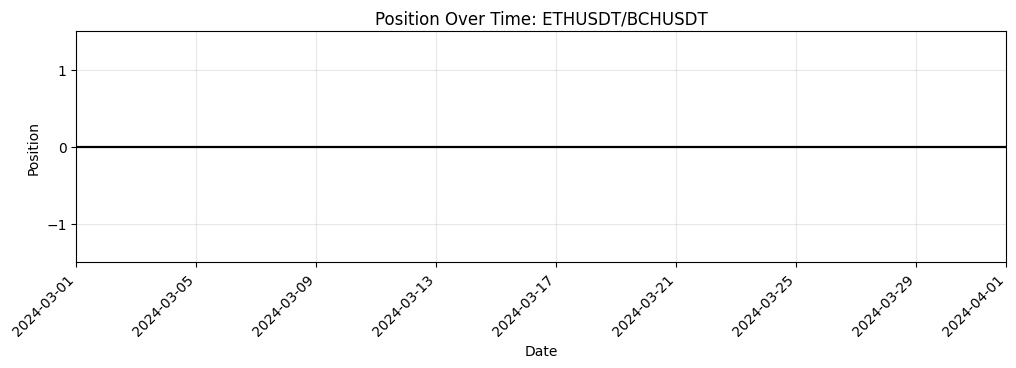

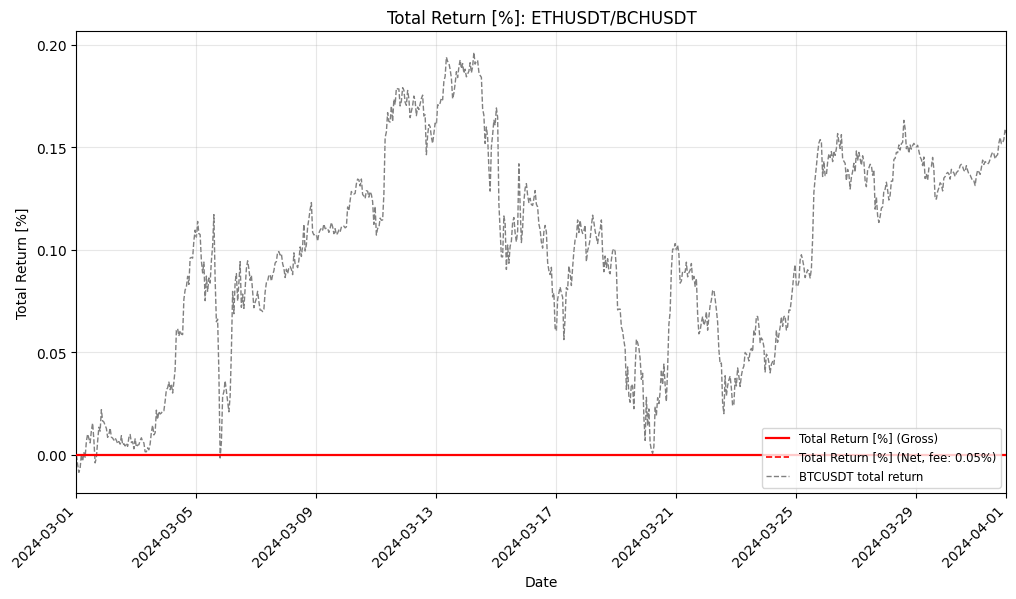

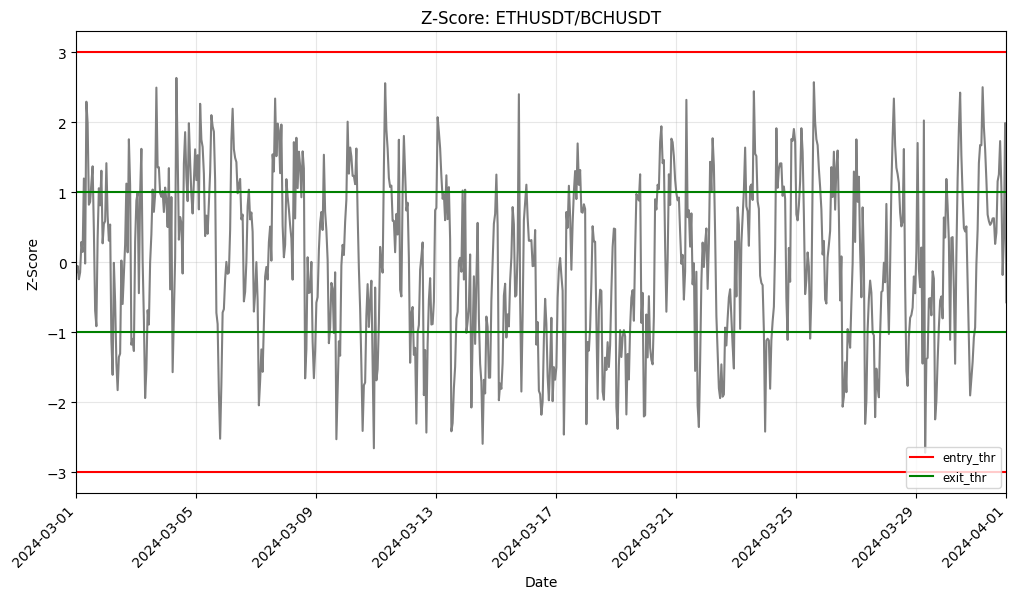

Pair: BTCUSDT/BCHUSDT
{'rolling_window': np.int64(11), 'entry_threshold': 2.9570296831840484, 'exit_threshold': 0.020743940515616736, 'stop_loss': 2.2387313271621307}
100.0
                      BTCUSDT  BCHUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11    304.2  -0.2440  0.4474      2.957    0.0207   
2024-03-01 01:00:00  61214.35    306.1  -0.5295  0.4157      2.957    0.0207   
2024-03-01 02:00:00  60980.00    313.5  -0.9026  0.2922      2.957    0.0207   
2024-03-01 03:00:00  61105.91    317.5  -0.4815  0.2807      2.957    0.0207   
2024-03-01 04:00:00  61524.09    315.1   0.6725  0.1317      2.957    0.0207   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00    680.5   1.1261  0.0047      2.957    0.0207   
2024-03-31 21:00:00  70856.00    678.8   1.0120  0.0056      2.957    0.0207   
2024-03-31 22:00:00  70970.

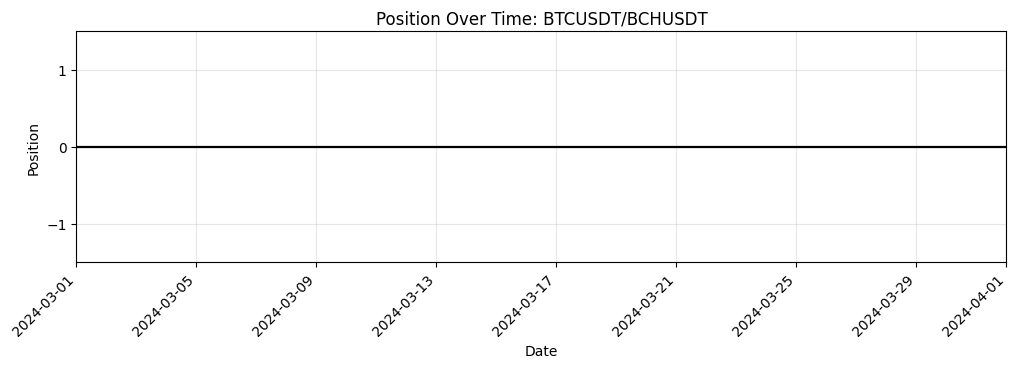

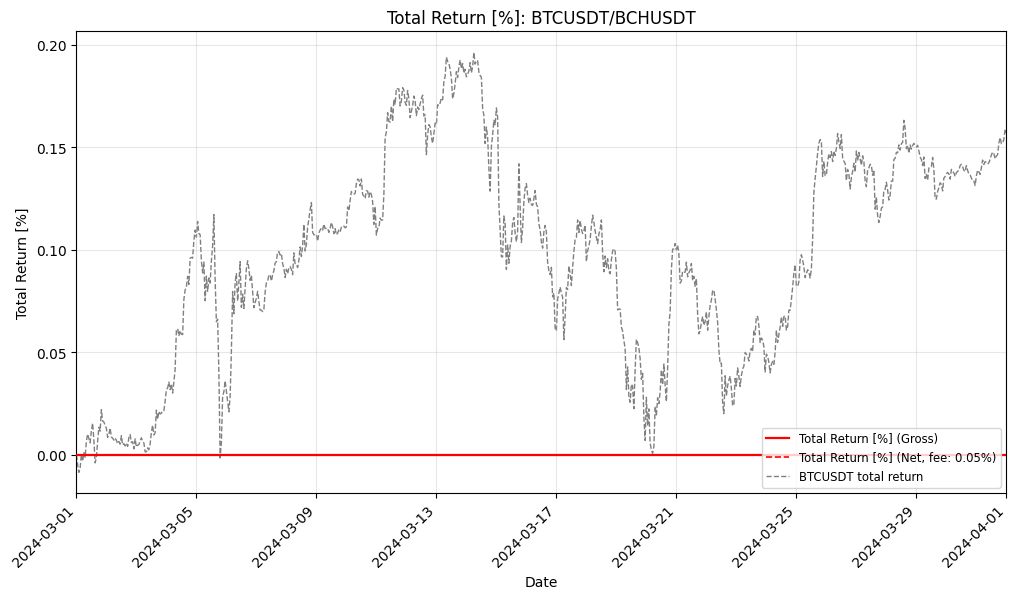

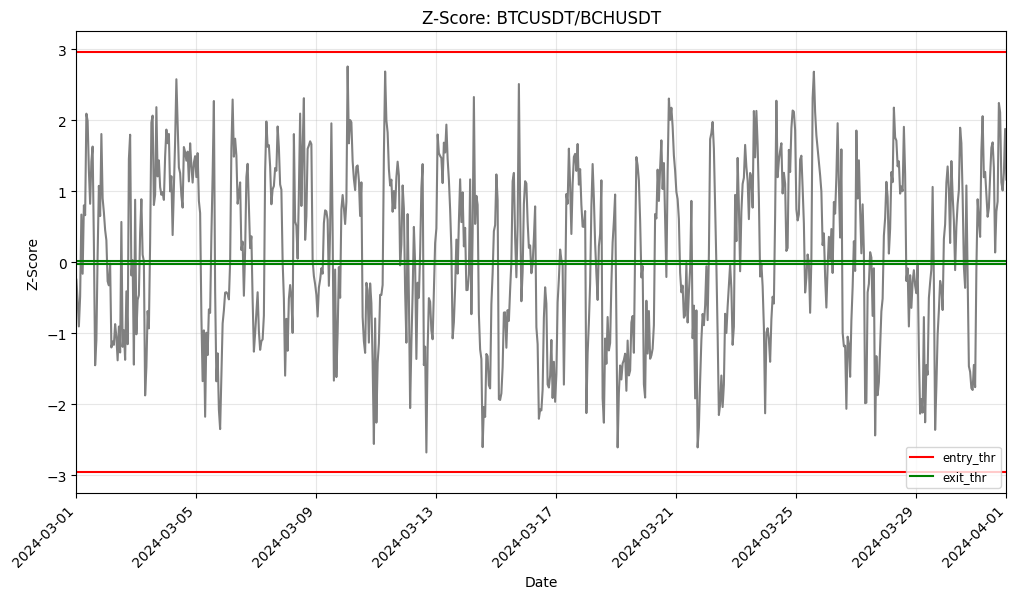

Pair: BNBUSDT/UNIUSDT
{'rolling_window': np.int64(10), 'entry_threshold': 3.0, 'exit_threshold': 1.0, 'stop_loss': 2.592732022888817}
100.0
                     BNBUSDT  UNIUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                     
2024-03-01 00:00:00    404.3   11.212   0.1085  0.2117        3.0       1.0   
2024-03-01 01:00:00    405.3   11.221   0.4595  0.2139        3.0       1.0   
2024-03-01 02:00:00    405.4   11.060   0.6451  0.3275        3.0       1.0   
2024-03-01 03:00:00    405.6   11.051   0.6913  0.4433        3.0       1.0   
2024-03-01 04:00:00    406.9   11.015   0.9490  0.4831        3.0       1.0   
...                      ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00    606.9   13.022   1.4720  0.1014        3.0       1.0   
2024-03-31 21:00:00    606.1   12.945   0.9545  0.2023        3.0       1.0   
2024-03-31 22:00:00    605.8   12.906   0.7490  0.2023        3.0     

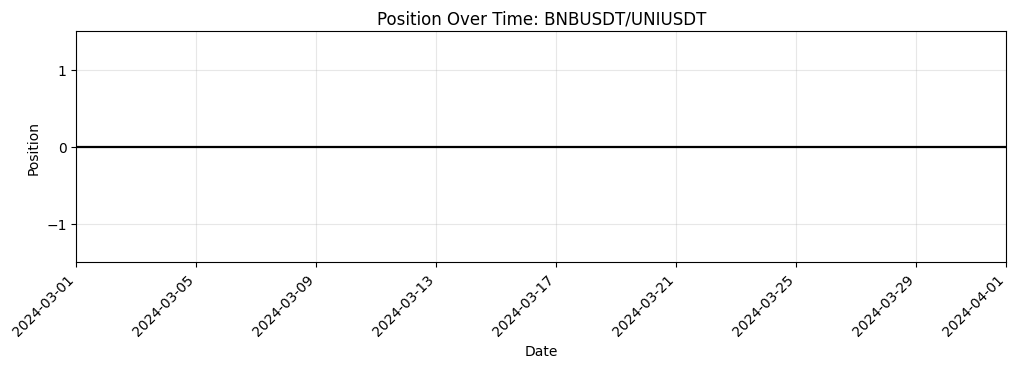

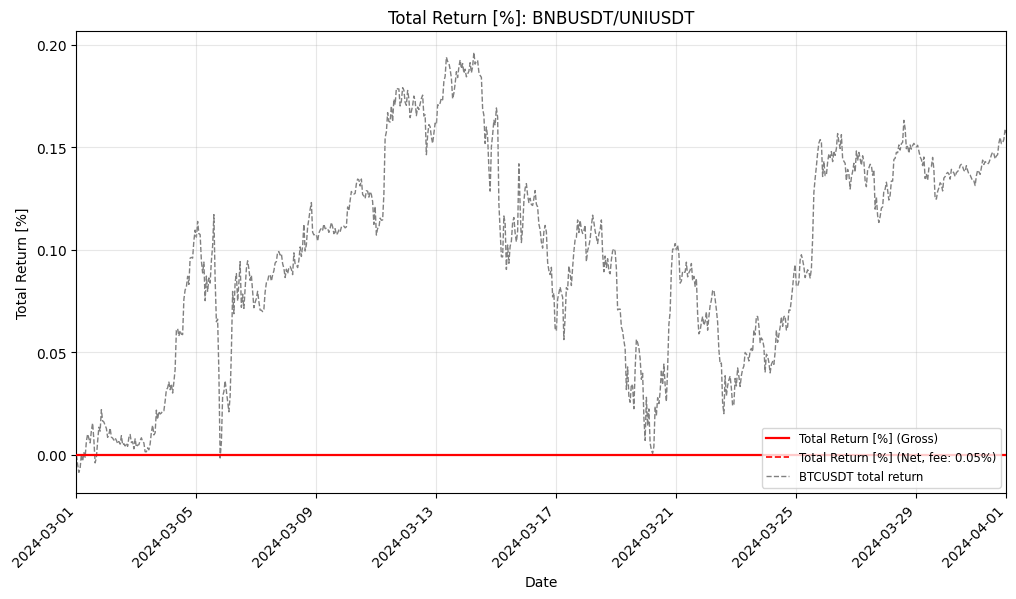

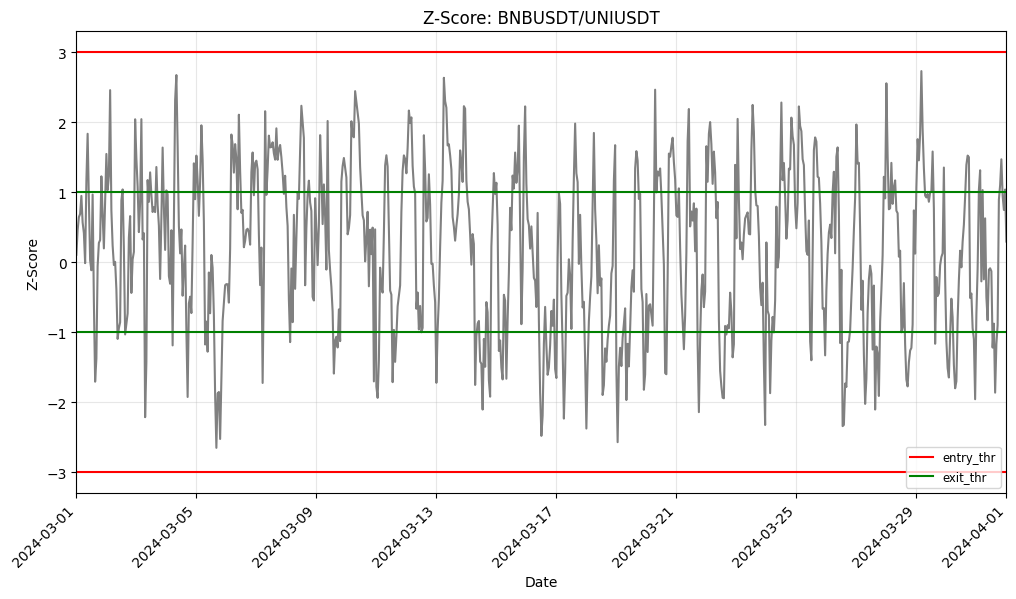

Pair: BTCUSDT/ADAUSDT
{'rolling_window': np.int64(10), 'entry_threshold': 2.925583559827407, 'exit_threshold': 0.5190015191402721, 'stop_loss': 1.168592984775519}
100.0
                      BTCUSDT  ADAUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11   0.6718  -0.0797  0.4280     2.9256     0.519   
2024-03-01 01:00:00  61214.35   0.6727  -0.4242  0.4240     2.9256     0.519   
2024-03-01 02:00:00  60980.00   0.6763  -0.8710  0.3994     2.9256     0.519   
2024-03-01 03:00:00  61105.91   0.6727  -0.5507  0.2798     2.9256     0.519   
2024-03-01 04:00:00  61524.09   0.6743   0.5772  0.2783     2.9256     0.519   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00   0.6490   1.0500 -0.0908     2.9256     0.519   
2024-03-31 21:00:00  70856.00   0.6461   0.9218  0.0007     2.9256     0.519   
2024-03-31 22:00:00  70970.00  

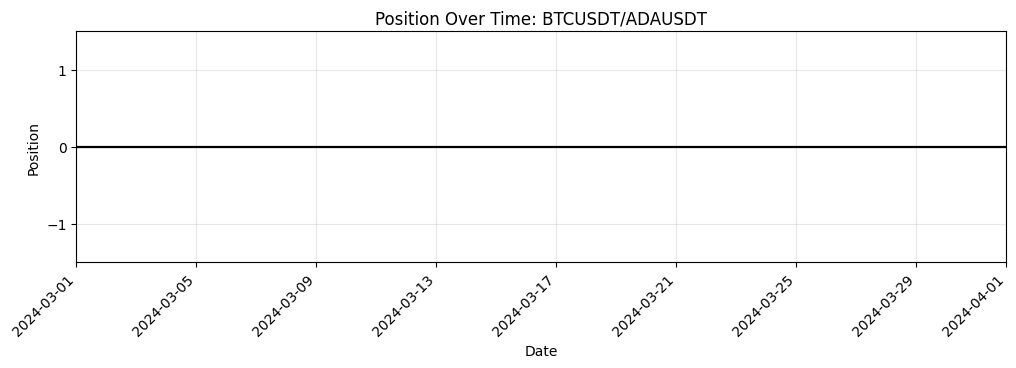

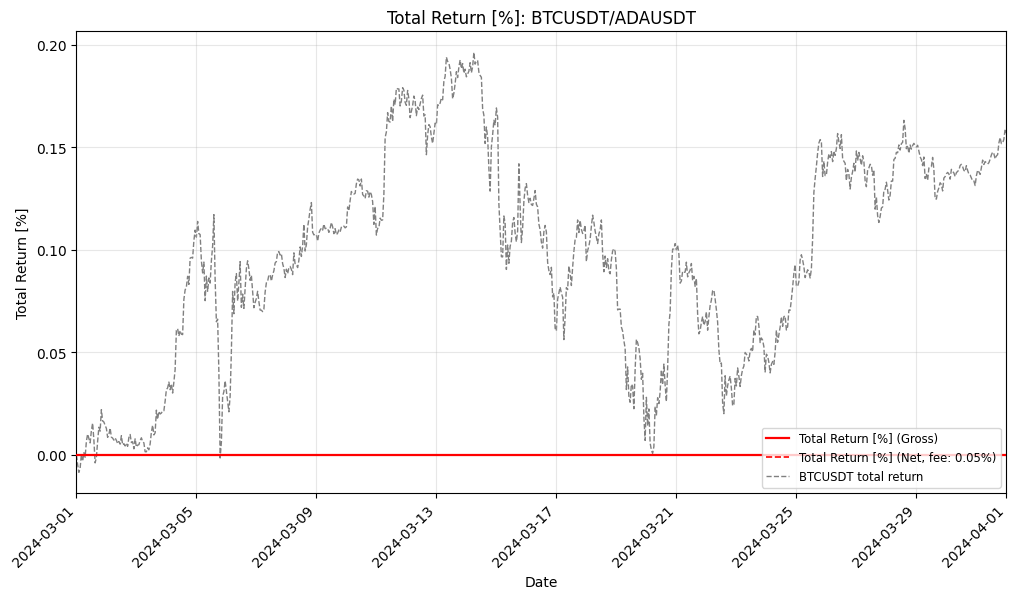

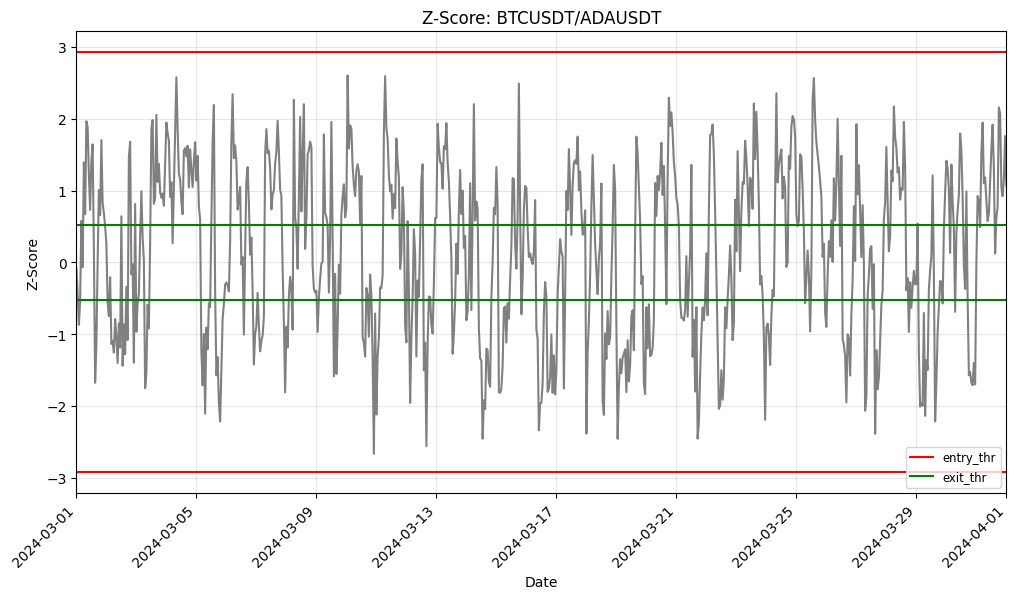

Pair: BTCUSDT/SOLUSDT
{'rolling_window': np.int64(11), 'entry_threshold': 3.0, 'exit_threshold': 0.6294814746578449, 'stop_loss': 2.4952076808801573}
100.0
                      BTCUSDT  SOLUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11   132.93  -0.2456  0.2162        3.0    0.6295   
2024-03-01 01:00:00  61214.35   135.71  -0.5299  0.2035        3.0    0.6295   
2024-03-01 02:00:00  60980.00   133.85  -0.8982  0.1990        3.0    0.6295   
2024-03-01 03:00:00  61105.91   133.94  -0.4739  0.1879        3.0    0.6295   
2024-03-01 04:00:00  61524.09   137.49   0.6730  0.1518        3.0    0.6295   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00   199.43   1.1259  0.3813        3.0    0.6295   
2024-03-31 21:00:00  70856.00   199.70   1.0116  0.4223        3.0    0.6295   
2024-03-31 22:00:00  70970.00   200.62   1.2

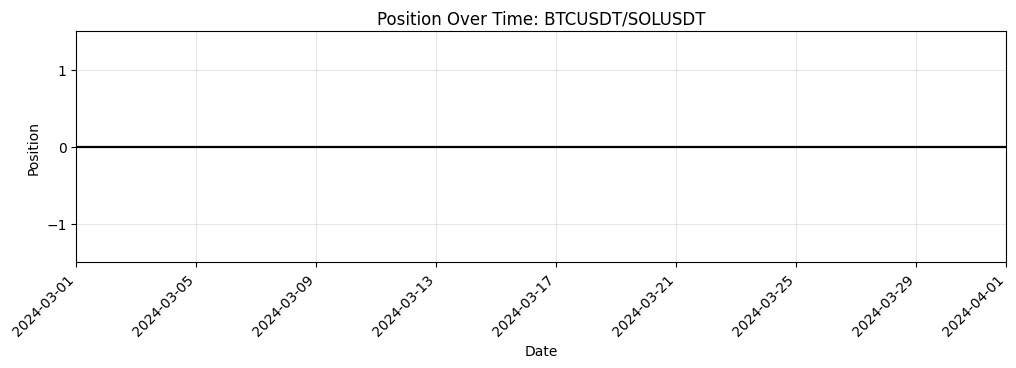

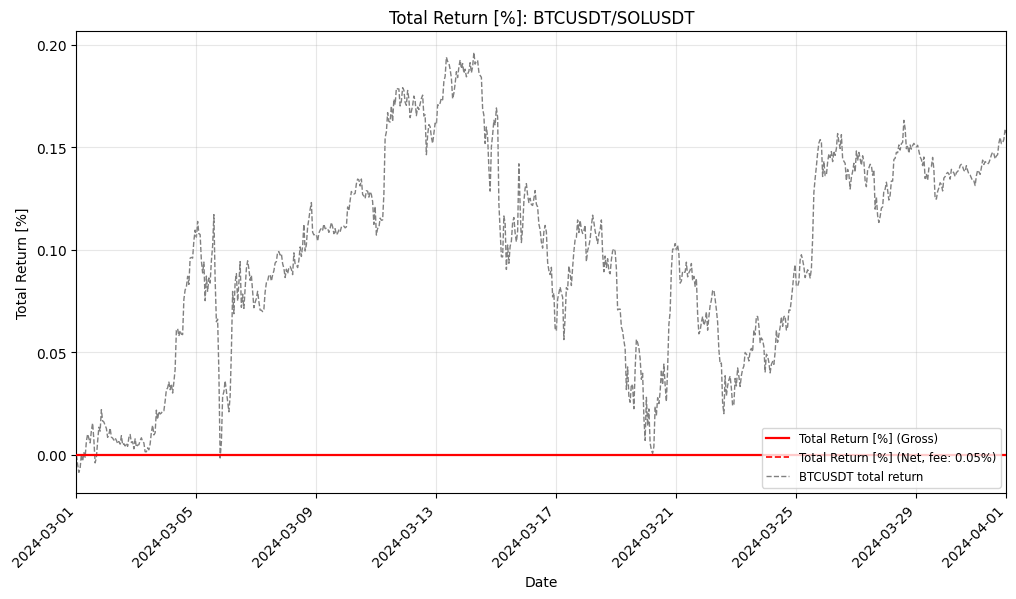

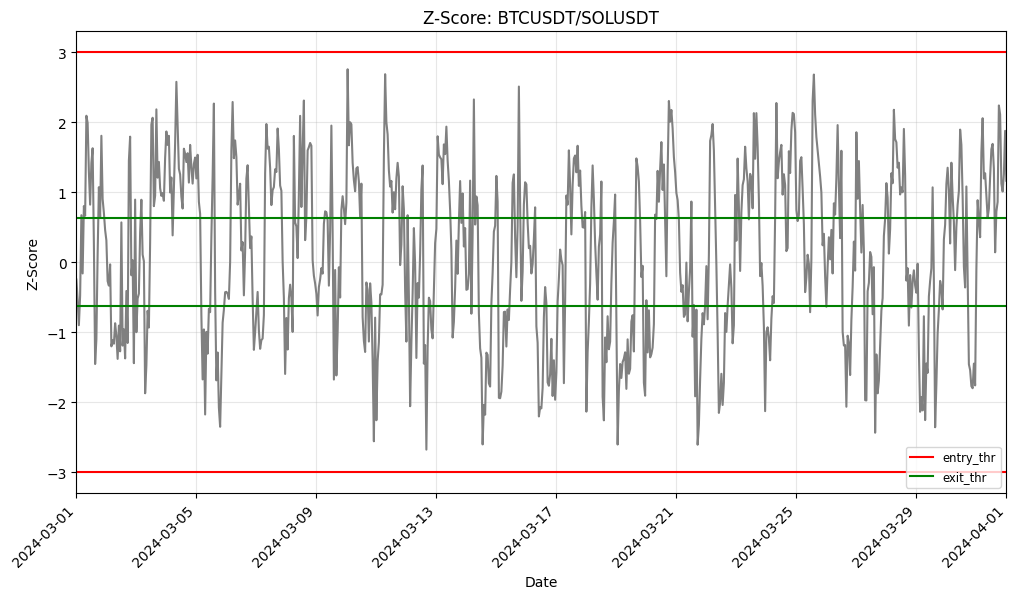

In [7]:
from modules.data_services.data_utils import add_returns
from modules.data_services.data_loaders import load_pair
from skopt.space import Integer, Real
from modules.data_services.data_models import Pair
from modules.performance.strategy import (
    calculate_stats,
    calc_bayesian_params,
    single_pair_strategy
)
from modules.visualization.plots import plot_positions, plot_zscore, plot_pnl

# Perform Bayesian Optimization
param_space = [
        Integer(10, 200, name="rolling_window"),
        Real(1.1, 3.0, name="entry_threshold"),
        Real(0.0, 1.0, name="exit_threshold"),
        Real(1.1, 3.0, name="stop_loss"),
    ]
metric = ("sortino_ratio_annual", "0.05% fee")
minimize = False  # Maximize metric

pairs = []
for ticker in tickers:
    ticker_x = ticker.split('-')[0]
    ticker_y = ticker.split('-')[1]
    print(f"Pair: {ticker_x}/{ticker_y}")

    best_params, best_score = calc_bayesian_params(ticker_x, ticker_y, fee_rate, initial_cash, position_size,
                                                   pre_training_start, training_start, training_end,
                                                   interval, beta_hedge, is_spread, param_space, metric,
                                                   minimize)
    print(best_params)
    print(best_score)

    # === 2. Test ===

    # Load pair and calculate returns
    pair = load_pair(x=ticker_x, y=ticker_y, start=pre_test_start, end=test_end, interval=interval)
    add_returns(pair)

    entry_threshold = best_params["entry_threshold"]
    exit_threshold = best_params["exit_threshold"]
    stop_loss = best_params["stop_loss"]
    rolling_window = best_params["rolling_window"]

    # Run strategy
    pair.test_start = test_start
    pair.fee_rate = fee_rate
    pair.initial_cash = initial_cash

    single_pair_strategy(pair, rolling_window, entry_threshold, exit_threshold, stop_loss, position_size,
                         beta_hedge, is_spread)
    print(pair.data.drop(columns=['total_return', 'total_fees', 'net_return']))

    # Calculate statistics
    pair.stats = calculate_stats(pair)
    print(pair.stats)

    pairs.append(pair)

    # Visualization
    plot_positions(pair, 'multi_pair_strategy', True, True)

    btc_data = load_data(
        tickers=['BTCUSDT'],
        start=test_start,
        end=test_end,
        interval=interval,
    )
    btc_data['BTC_return'] = btc_data['BTCUSDT'].pct_change()
    btc_data.loc[btc_data.index[0], 'BTC_return'] = 0.0
    btc_data['BTC_cum_return'] = (1 + btc_data['BTC_return']).cumprod() - 1

    plot_pnl(pair, btc_data, 'multi_pair_strategy', True, True)
    plot_zscore(pair)

In [8]:
cols_to_sum = ['position', 'total_return', 'total_fees', 'net_return']
summary_data = pairs[0].data[cols_to_sum].copy()
for p in pairs[1:]:
    summary_data += p.data[cols_to_sum]
summary = Pair(data=summary_data, start=pre_test_start, test_start=test_start, end=test_end,
               interval=interval, fee_rate=fee_rate, initial_cash=initial_cash * 5)
summary.data['total_return_pct'] = summary.data['total_return'] / (initial_cash * 5)
summary.data['net_return_pct'] = summary.data['net_return'] / (initial_cash * 5)
summary.data['position'] = summary.data['position'] / 5
summary.stats = calculate_stats(summary)

In [9]:
# Show statistics
summary.stats

,0% fee,0.05% fee
metric,,
total_return,0.0,0.0
cagr,0.0,0.0
volatility,0.0,0.0
volatility_annual,0.0,0.0
max_drawdown,0.0,0.0
win_count,0.0,0.0
lose_count,0.0,0.0
win_rate,NaN,NaN
max_win,NaN,NaN


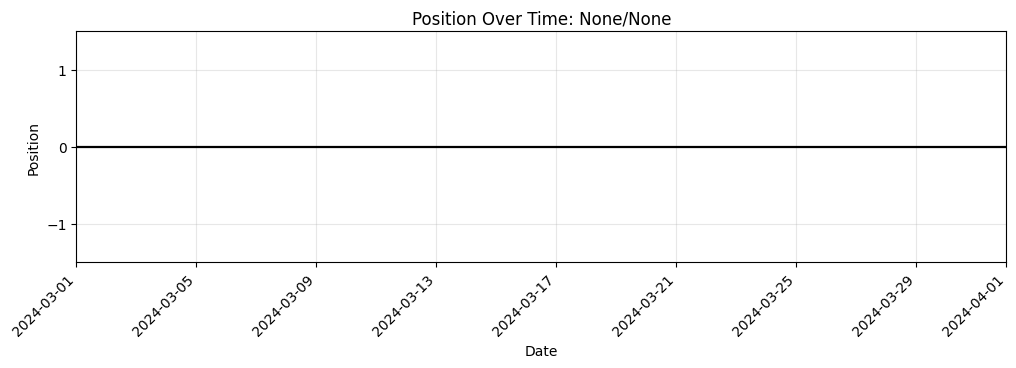

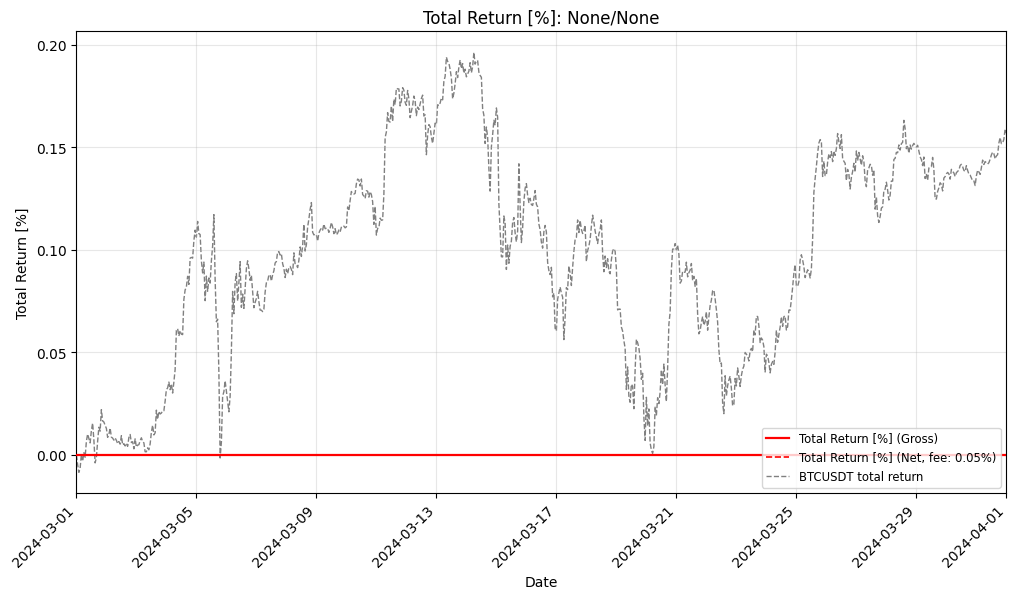

In [10]:
# Visualization
from modules.visualization.plots import plot_pnl

plot_positions(summary, 'multi_pair_strategy', True, True)

btc_data = load_data(
    tickers=['BTCUSDT'],
    start=test_start,
    end=test_end,
    interval=interval,
)
btc_data['BTC_return'] = btc_data['BTCUSDT'].pct_change()
btc_data.loc[btc_data.index[0], 'BTC_return'] = 0.0
btc_data['BTC_cum_return'] = (1 + btc_data['BTC_return']).cumprod() - 1

plot_pnl(summary, btc_data, 'multi_pair_strategy', False, True)